In [ ]:
''' GPT Link: https://chatgpt.com/share/67a4b1c8-20d4-8003-9b7a-a1f7e3e7695b '''

In [ ]:
'''1.	Combine machine learning techniques with traditional filtering methods to adaptively choose the best denoising filter.'''

In [18]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


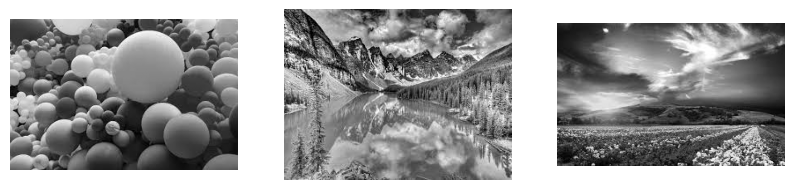

In [19]:
# List of 10 different images (Change paths accordingly)
image_paths = [
    r'C:\Users\91949\OneDrive\Desktop\images\image1.jpg', r'C:\Users\91949\OneDrive\Desktop\images\image2.jpg', r'C:\Users\91949\OneDrive\Desktop\images\image3.jpg',
    r'C:\Users\91949\OneDrive\Desktop\images\image4.jpg', r'C:\Users\91949\OneDrive\Desktop\images\image5.jpg', r'C:\Users\91949\OneDrive\Desktop\images\image6.jpg',
    r'C:\Users\91949\OneDrive\Desktop\images\image7.jpg', r'C:\Users\91949\OneDrive\Desktop\images\image8.jpg', r'C:\Users\91949\OneDrive\Desktop\images\image9.jpg',
    r'C:\Users\91949\OneDrive\Desktop\images\image10.jpg'
]

# Load images as grayscale
images = [cv2.imread(img, cv2.IMREAD_GRAYSCALE) for img in image_paths]

# Display first 3 images
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap="gray")
    ax.axis("off")
plt.show()

In [20]:
def apply_gaussian_filter(image):
    return cv2.GaussianBlur(image, (5,5), 0)

def apply_median_filter(image):
    return cv2.medianBlur(image, 5)

def apply_sobel_filter(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    return cv2.magnitude(sobel_x, sobel_y).astype(np.uint8)


In [21]:
# Dictionary to store results
results = []

for idx, img in enumerate(images):
    original = img.copy()
    
    # Apply filters
    filtered_gaussian = apply_gaussian_filter(original)
    filtered_median = apply_median_filter(original)
    filtered_sobel = apply_sobel_filter(original)
    
    # Compute PSNR
    psnr_gaussian = psnr(original, filtered_gaussian)
    psnr_median = psnr(original, filtered_median)
    psnr_sobel = psnr(original, filtered_sobel)
    
    # Store results
    results.append(["Image_" + str(idx+1), "Gaussian", psnr_gaussian])
    results.append(["Image_" + str(idx+1), "Median", psnr_median])
    results.append(["Image_" + str(idx+1), "Sobel", psnr_sobel])

# Convert to DataFrame
df = pd.DataFrame(results, columns=["Image", "Filter", "PSNR"])

# Save results
df.to_csv("psnr_results.csv", index=False)
print("PSNR results saved to 'psnr_results.csv'")

# Display results
df.head()


PSNR results saved to 'psnr_results.csv'


Image    Filter       PSNR
0  Image_1  Gaussian  27.130459
1  Image_1    Median  26.951414
2  Image_1     Sobel   8.954202
3  Image_2  Gaussian  22.321085
4  Image_2    Median  20.623696

In [22]:
# Prepare dataset for ML
X = df[["PSNR"]].values
y = df["Filter"].values

# Encode filter names as numbers
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train SVM Model
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

# Accuracy
accuracy = svm_model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 50.00%


Best filter predicted: Median


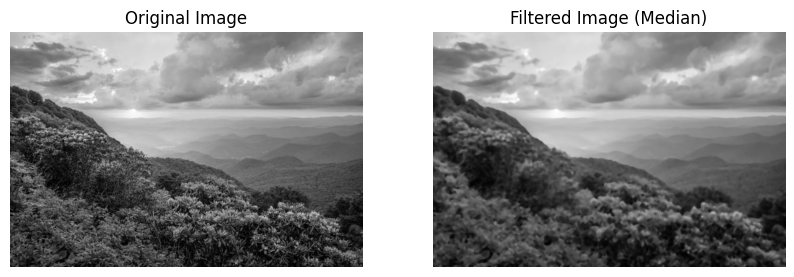

In [25]:
# Load test image
test_image = cv2.imread(r'C:\Users\91949\OneDrive\Desktop\images\test.jpg', cv2.IMREAD_GRAYSCALE)

# Apply filters
test_gaussian = apply_gaussian_filter(test_image)
test_median = apply_median_filter(test_image)
test_sobel = apply_sobel_filter(test_image)

# Compute PSNR values
psnr_gaussian = psnr(test_image, test_gaussian)
psnr_median = psnr(test_image, test_median)
psnr_sobel = psnr(test_image, test_sobel)

# Prepare test data
test_data = np.array([[psnr_gaussian], [psnr_median], [psnr_sobel]])

# Predict best filter
predicted = svm_model.predict(test_data)
best_filter = encoder.inverse_transform([predicted[np.argmax(test_data)]])[0]

print(f"Best filter predicted: {best_filter}")

# Apply best filter
if best_filter == "Gaussian":
    best_filtered_image = test_gaussian
elif best_filter == "Median":
    best_filtered_image = test_median
else:
    best_filtered_image = test_sobel

# Display results
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(test_image, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(best_filtered_image, cmap="gray")
axes[1].set_title(f"Filtered Image ({best_filter})")
axes[1].axis("off")

plt.show()


In [ ]:
'''2.	Develop a multi-stage non-linear filtering pipeline to effectively remove impulse noise (salt-and-pepper noise) from an image.  Add varying levels of salt-and-pepper noise to a grayscale image (e.g., 10%, 30%, 50% noise).'''

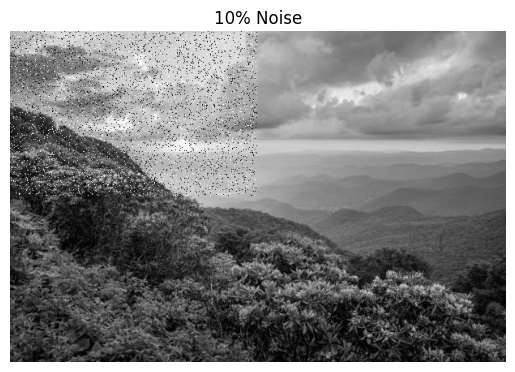

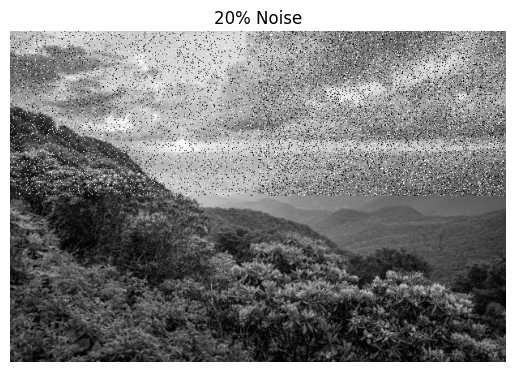

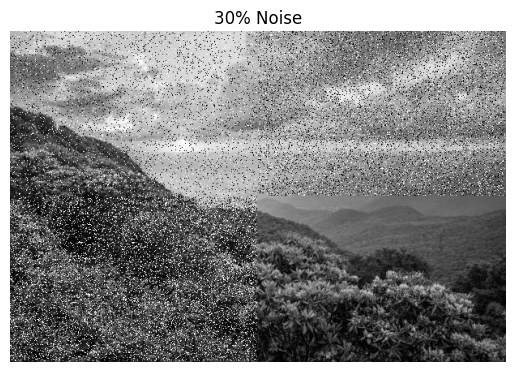

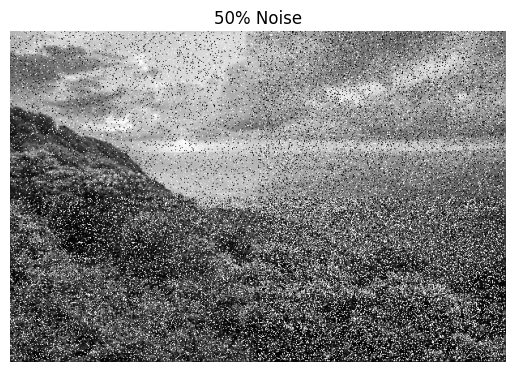

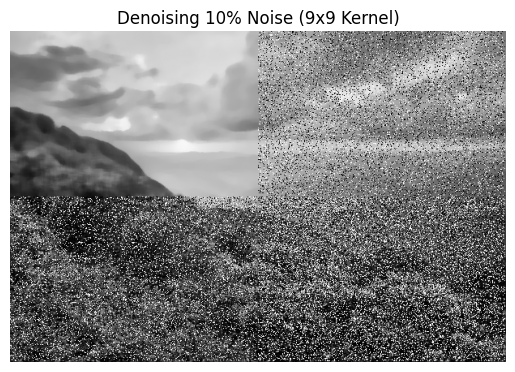

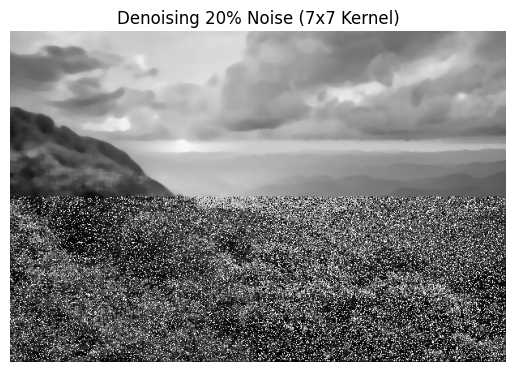

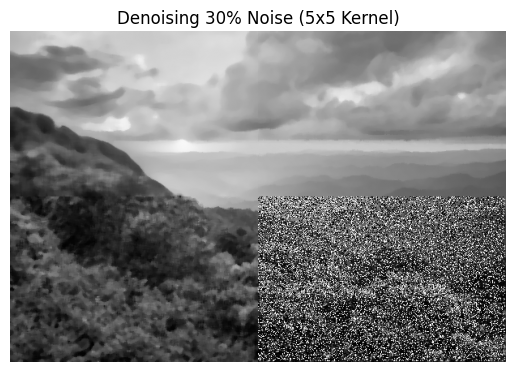

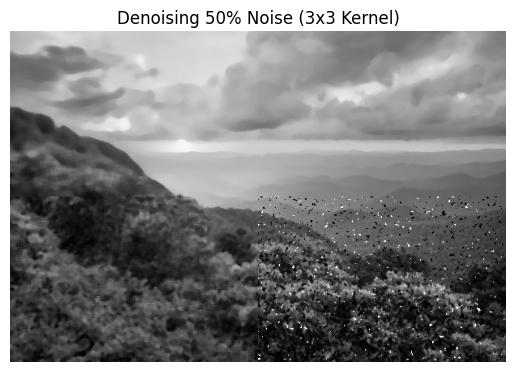

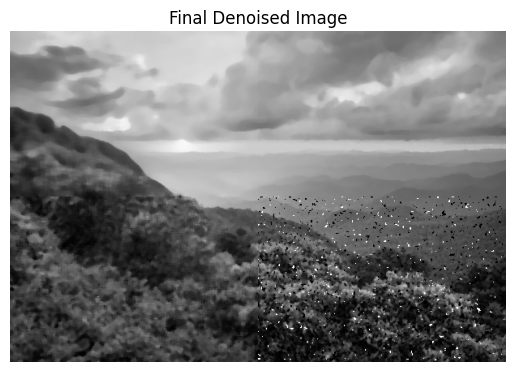

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Final Denoised Image'),
 (np.float64(-0.5), np.float64(611.5), np.float64(407.5), np.float64(-0.5)),
 None)

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to add salt-and-pepper noise
def add_salt_and_pepper_noise(image, noise_ratio):
    noisy_image = image.copy()
    total_pixels = image.size
    num_salt = int(noise_ratio * total_pixels / 2)
    num_pepper = num_salt

    # Add salt noise (white pixels)
    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 255

    # Add pepper noise (black pixels)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0

    return noisy_image

# Function to apply median filter for denoising
def apply_median_filter(image, kernel_size, x_start, x_end, y_start, y_end):
    filtered_image = image.copy()
    filtered_image[y_start:y_end, x_start:x_end] = cv2.medianBlur(image[y_start:y_end, x_start:x_end], kernel_size)
    return filtered_image

# Load grayscale image
image = cv2.imread(r'C:\Users\91949\OneDrive\Desktop\images\test.jpg', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError("Image file not found. Check the file path.")

h, w = image.shape
x_mid, y_mid = w // 2, h // 2  # Midpoints to divide the image into 4 parts

# Add noise to different parts of the image
noisy_image = image.copy()
noisy_image[0:y_mid, 0:x_mid] = add_salt_and_pepper_noise(image[0:y_mid, 0:x_mid], 0.10)  # 10% noise
plt.figure(), plt.imshow(noisy_image, cmap='gray'), plt.title("10% Noise"), plt.axis("off"), plt.show()

noisy_image[0:y_mid, x_mid:w] = add_salt_and_pepper_noise(image[0:y_mid, x_mid:w], 0.20)  # 20% noise
plt.figure(), plt.imshow(noisy_image, cmap='gray'), plt.title("20% Noise"), plt.axis("off"), plt.show()

noisy_image[y_mid:h, 0:x_mid] = add_salt_and_pepper_noise(image[y_mid:h, 0:x_mid], 0.30)  # 30% noise
plt.figure(), plt.imshow(noisy_image, cmap='gray'), plt.title("30% Noise"), plt.axis("off"), plt.show()

noisy_image[y_mid:h, x_mid:w] = add_salt_and_pepper_noise(image[y_mid:h, x_mid:w], 0.50)  # 50% noise
plt.figure(), plt.imshow(noisy_image, cmap='gray'), plt.title("50% Noise"), plt.axis("off"), plt.show()

# Apply adaptive filtering (Non-linear median filtering)
denoised_image = noisy_image.copy()

# Denoise each region with different kernel sizes
denoised_image = apply_median_filter(denoised_image, 9, 0, x_mid, 0, y_mid)  # 9x9 filter (10% noise)
plt.figure(), plt.imshow(denoised_image, cmap='gray'), plt.title("Denoising 10% Noise (9x9 Kernel)"), plt.axis("off"), plt.show()

denoised_image = apply_median_filter(denoised_image, 7, x_mid, w, 0, y_mid)  # 7x7 filter (20% noise)
plt.figure(), plt.imshow(denoised_image, cmap='gray'), plt.title("Denoising 20% Noise (7x7 Kernel)"), plt.axis("off"), plt.show()

denoised_image = apply_median_filter(denoised_image, 5, 0, x_mid, y_mid, h)  # 5x5 filter (30% noise)
plt.figure(), plt.imshow(denoised_image, cmap='gray'), plt.title("Denoising 30% Noise (5x5 Kernel)"), plt.axis("off"), plt.show()

denoised_image = apply_median_filter(denoised_image, 3, x_mid, w, y_mid, h)  # 3x3 filter (50% noise)
plt.figure(), plt.imshow(denoised_image, cmap='gray'), plt.title("Denoising 50% Noise (3x3 Kernel)"), plt.axis("off"), plt.show()

# Final fully denoised image
plt.figure(), plt.imshow(denoised_image, cmap='gray'), plt.title("Final Denoised Image"), plt.axis("off"), plt.show()


In [ ]:
'''3.	Implement a real-time hybrid filtering approach combining linear and non-linear filters for denoising video frames. (try for Different type of Noises)'''

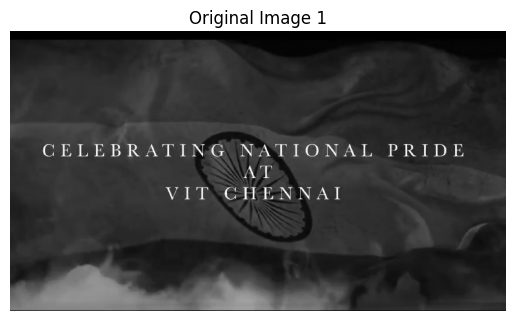

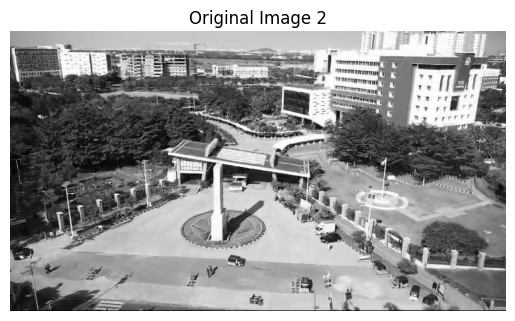

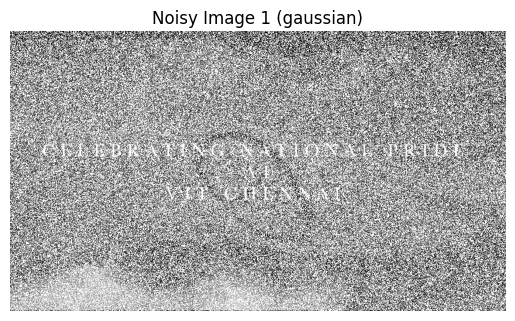

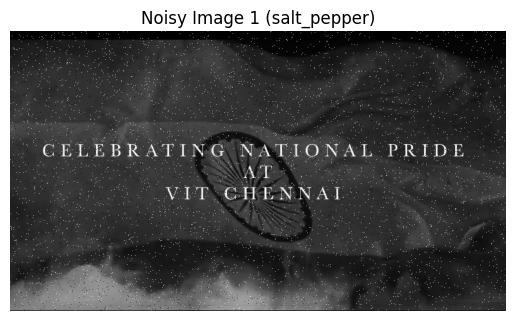

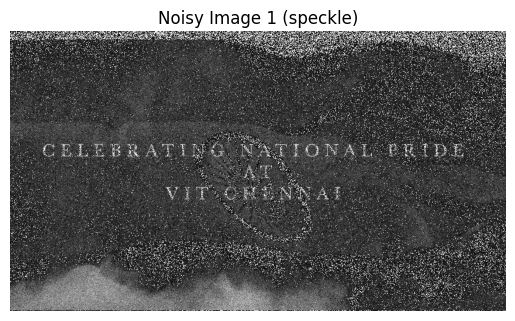

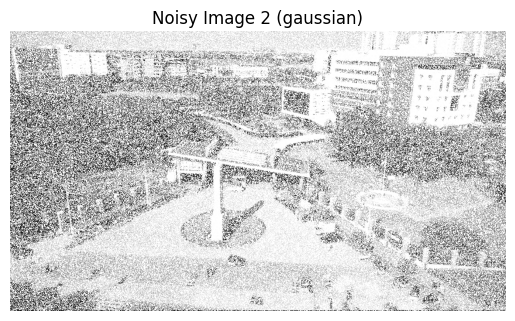

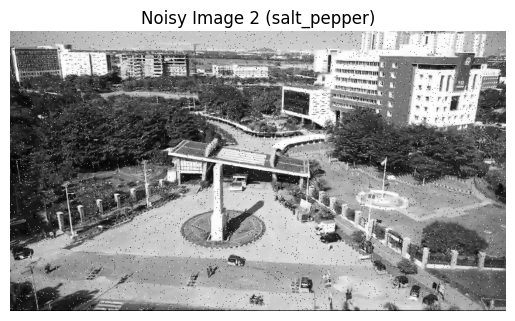

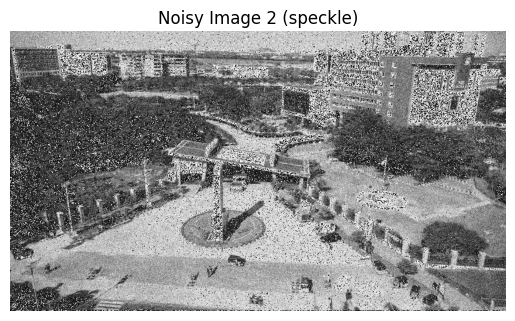

Processing Image 1 with gaussian noise...


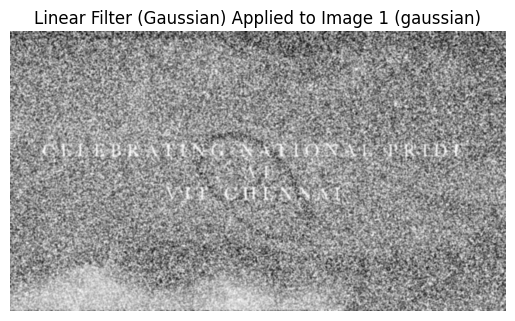

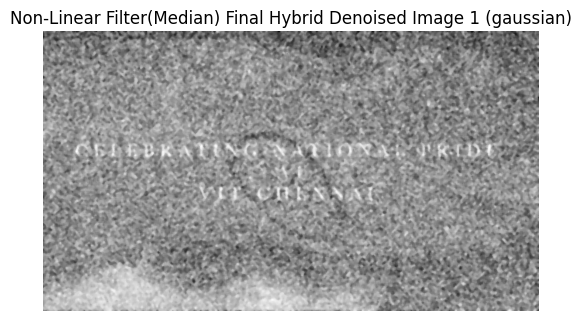

Processing Image 1 with salt_pepper noise...


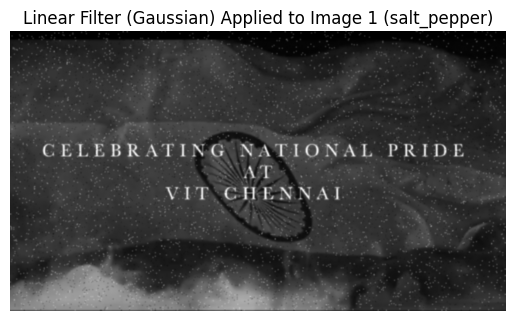

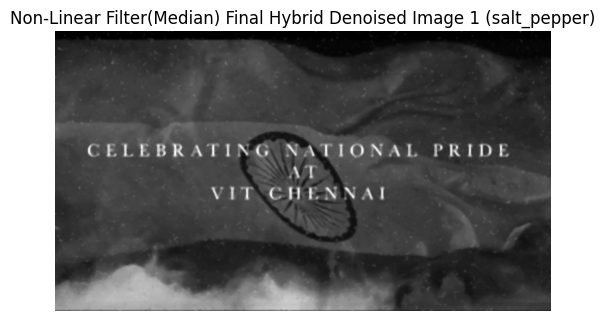

Processing Image 1 with speckle noise...


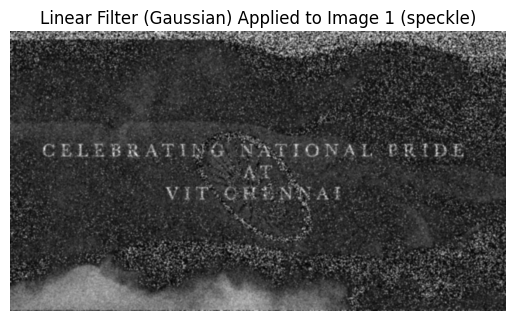

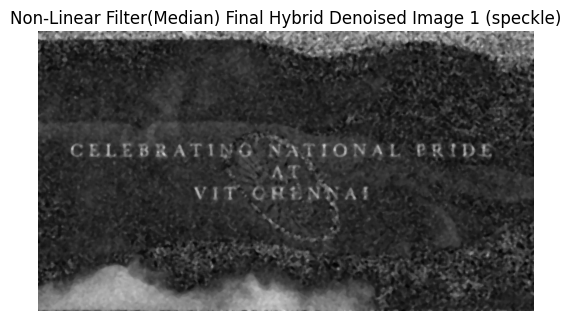

Processing Image 2 with gaussian noise...


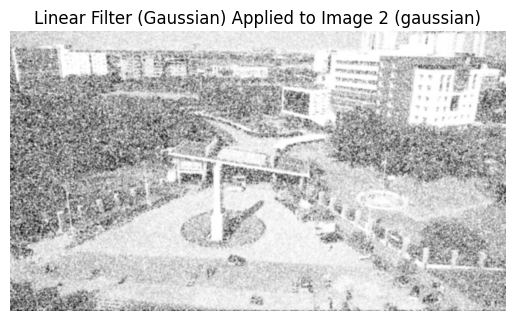

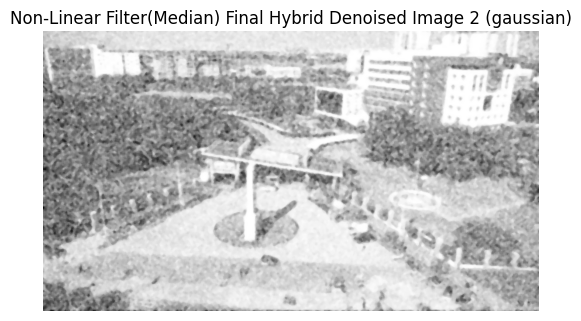

Processing Image 2 with salt_pepper noise...


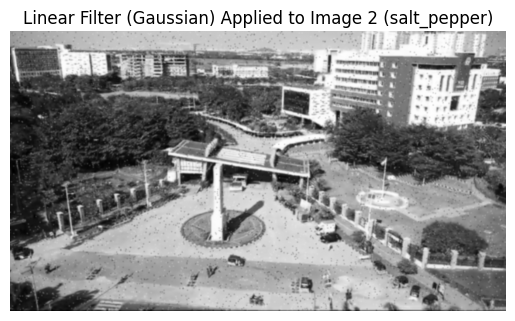

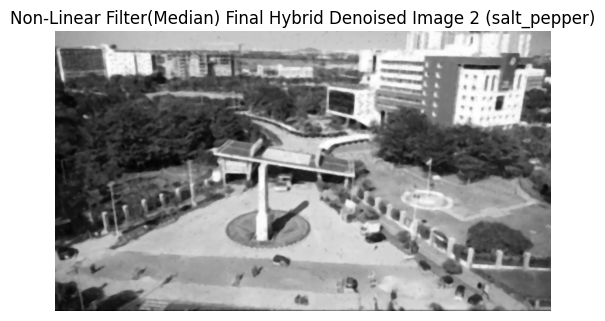

Processing Image 2 with speckle noise...


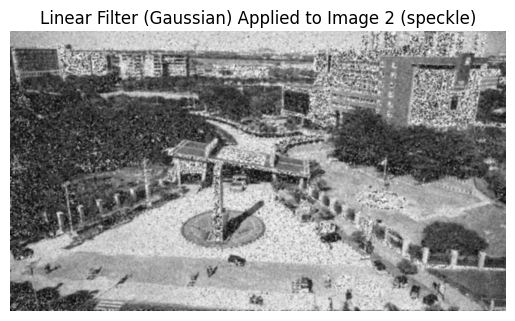

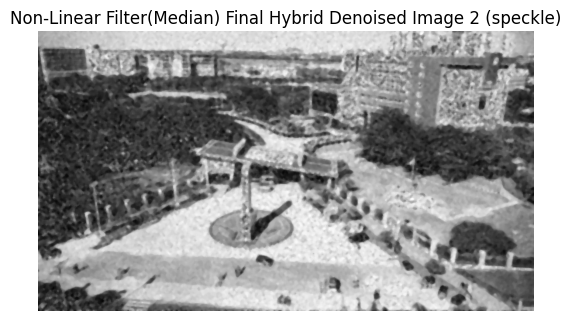

Metrics for Image 1 (gaussian noise): PSNR = 7.25, SSIM = 0.1903
Metrics for Image 1 (salt_pepper noise): PSNR = 27.63, SSIM = 0.9204
Metrics for Image 1 (speckle noise): PSNR = 17.31, SSIM = 0.5763
Metrics for Image 2 (gaussian noise): PSNR = 10.18, SSIM = 0.4234
Metrics for Image 2 (salt_pepper noise): PSNR = 22.28, SSIM = 0.7078
Metrics for Image 2 (speckle noise): PSNR = 16.94, SSIM = 0.4972


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim

# Function to extract frames from the video
def extract_frames(video_path, frame_indices):
    cap = cv2.VideoCapture(video_path)
    frames = []
    for idx in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if ret:
            frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))  # Convert to grayscale
    cap.release()
    return frames

# Function to add noise to the image
def add_noise(image, noise_type):
    noisy_image = image.copy()
    h, w = image.shape

    if noise_type == "gaussian":
        noise = np.random.normal(0, 25, (h, w)).astype(np.uint8)
        noisy_image = cv2.add(image, noise)

    elif noise_type == "salt_pepper":
        salt_pepper_ratio = 0.02
        num_salt = int(salt_pepper_ratio * h * w / 2)
        num_pepper = num_salt
        coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
        noisy_image[coords[0], coords[1]] = 255
        coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
        noisy_image[coords[0], coords[1]] = 0

    elif noise_type == "speckle":
        noise = np.random.randn(h, w) * 25
        noisy_image = image + noise.astype(np.uint8)

    return np.clip(noisy_image, 0, 255)

# Function to apply a linear filter (Gaussian Blur)
def apply_linear_filter(image):
    return cv2.GaussianBlur(image, (5, 5), 1)

# Function to apply a non-linear filter (Median Filter)
def apply_non_linear_filter(image):
    return cv2.medianBlur(image, 5)

# Function to compute PSNR and SSIM
def compute_metrics(original, denoised):
    psnr_value = psnr(original, denoised)
    ssim_value = ssim(original, denoised)
    return psnr_value, ssim_value

# Extract two frames from video
video_path = r'C:\Users\91949\OneDrive\Desktop\images\video.mp4'  # Provide your video file path
frame_indices = [30, 100]  # Choose different time stamps
frames = extract_frames(video_path, frame_indices)

if len(frames) < 2:
    raise ValueError("Couldn't extract enough frames from the video.")

original_image_1 = frames[0]
original_image_2 = frames[1]

plt.figure(), plt.imshow(original_image_1, cmap="gray"), plt.title("Original Image 1"), plt.axis("off"), plt.show()
plt.figure(), plt.imshow(original_image_2, cmap="gray"), plt.title("Original Image 2"), plt.axis("off"), plt.show()

# Apply different types of noise to both images
noise_types = ["gaussian", "salt_pepper", "speckle"]
noisy_images_1 = {noise: add_noise(original_image_1, noise) for noise in noise_types}
noisy_images_2 = {noise: add_noise(original_image_2, noise) for noise in noise_types}

# Display noisy images for Image 1
for noise_type, img in noisy_images_1.items():
    plt.figure(), plt.imshow(img, cmap="gray"), plt.title(f"Noisy Image 1 ({noise_type})"), plt.axis("off"), plt.show()

# Display noisy images for Image 2
for noise_type, img in noisy_images_2.items():
    plt.figure(), plt.imshow(img, cmap="gray"), plt.title(f"Noisy Image 2 ({noise_type})"), plt.axis("off"), plt.show()

# Denoise using hybrid approach for Image 1
denoised_images_1 = {}
for noise_type, noisy_img in noisy_images_1.items():
    print(f"Processing Image 1 with {noise_type} noise...")

    # Linear filtering step
    linear_filtered_1 = apply_linear_filter(noisy_img)
    plt.figure(), plt.imshow(linear_filtered_1, cmap="gray"), plt.title(f"Linear Filter (Gaussian) Applied to Image 1 ({noise_type})"), plt.axis("off"), plt.show()

    # Non-linear filtering step
    final_denoised_1 = apply_non_linear_filter(linear_filtered_1)
    plt.figure(), plt.imshow(final_denoised_1, cmap="gray"), plt.title(f"Non-Linear Filter(Median) Final Hybrid Denoised Image 1 ({noise_type})"), plt.axis("off"), plt.show()

    denoised_images_1[noise_type] = final_denoised_1

# Denoise using hybrid approach for Image 2
denoised_images_2 = {}
for noise_type, noisy_img in noisy_images_2.items():
    print(f"Processing Image 2 with {noise_type} noise...")

    # Linear filtering step
    linear_filtered_2 = apply_linear_filter(noisy_img)
    plt.figure(), plt.imshow(linear_filtered_2, cmap="gray"), plt.title(f"Linear Filter (Gaussian) Applied to Image 2 ({noise_type})"), plt.axis("off"), plt.show()

    # Non-linear filtering step
    final_denoised_2 = apply_non_linear_filter(linear_filtered_2)
    plt.figure(), plt.imshow(final_denoised_2, cmap="gray"), plt.title(f"Non-Linear Filter(Median) Final Hybrid Denoised Image 2 ({noise_type})"), plt.axis("off"), plt.show()

    denoised_images_2[noise_type] = final_denoised_2

# Compute PSNR & SSIM for each denoised image (Image 1)
for noise_type, denoised_img in denoised_images_1.items():
    psnr_value, ssim_value = compute_metrics(original_image_1, denoised_img)
    print(f"Metrics for Image 1 ({noise_type} noise): PSNR = {psnr_value:.2f}, SSIM = {ssim_value:.4f}")

# Compute PSNR & SSIM for each denoised image (Image 2)
for noise_type, denoised_img in denoised_images_2.items():
    psnr_value, ssim_value = compute_metrics(original_image_2, denoised_img)
    print(f"Metrics for Image 2 ({noise_type} noise): PSNR = {psnr_value:.2f}, SSIM = {ssim_value:.4f}")
